In [1]:
#import google drive files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [54]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:

document_text = open('/content/gdrive/MyDrive/Colab Notebooks/tamil_large.txt', 'r')
corpus = document_text.read()
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [121]:
corpus_tokens = word_tokenize(corpus)
print(corpus_tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import *

In [122]:
bigrams = ngrams(corpus_tokens, 1)

bigrams_c = {}
for b in bigrams:
    if b not in bigrams_c:
        bigrams_c[b] = 1
    else:
        bigrams_c[b] += 1

print(bigrams_c)

{('அமைச்சின்',): 276, ('பணிகளை',): 25, ('முன்னெடுப்பதற்கு',): 3, ('கௌர',): 2, ('அமைச்சர்',): 44, ('வாசுதேவ',): 10, ('நாணாயக்கார',): 4, ('அவர்களுக்கு',): 30, ('தத்துவம்',): 4, ('வழங்கப்பட்டதுடன்',): 1, ('திருமதி',): 26, ('எம்',): 135, ('.',): 11613, ('எஸ்',): 88, ('விக்கிரமசிங்க',): 2, ('செயலாளராக',): 2, ('செயலாற்றுகிறார்',): 1, ('இவ்வமைச்சு',): 2, ('இல',): 96, ('40',): 25, (',',): 3985, ('புத்கமுவ',): 3, ('வீதி',): 39, ('இராஜகிரிய',): 11, ('எனும்',): 48, ('முகவரியில்',): 7, ('அமையப்பெற்றுள்ளது',): 1, ('தேசிய',): 338, ('மொழிகள்',): 148, ('மற்றும்',): 1758, ('சமூக',): 156, ('ஒருமைப்பாட்டு',): 69, ('அதிகாரங்கள்',): 4, ('செயற்பாடுகள்',): 25, ('\uf0b7',): 24, ('ஒருமைப்பாடு',): 14, ('தொடர்பான',): 235, ('கொள்கைகள்',): 8, ('நிகழ்ச்சித்',): 58, ('திட்டங்களையும்',): 3, ('கருத்திட்டங்களையும்',): 2, ('வகுத்தமைத்தல்',): 2, ('குறித்த',): 200, ('நோக்கங்களை',): 5, ('எய்தும்',): 1, ('பொருட்டு',): 75, ('திட்டமிடல்',): 44, ('அதிகாரிகளுடன்',): 3, ('உடன்பட்ட',): 1, ('செயற்பாட்டு',): 16, ('எல்லைகுள்ளும்',):

In [123]:
import operator
sorted_d = dict( sorted(bigrams_c.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_d.values())

Dictionary in descending order by value :  dict_values([11613, 4693, 3985, 1758, 1298, 1140, 986, 982, 921, 829, 575, 489, 481, 456, 452, 448, 447, 440, 435, 412, 363, 353, 350, 350, 342, 338, 336, 318, 311, 311, 292, 291, 276, 271, 256, 255, 241, 235, 233, 233, 227, 225, 219, 214, 212, 205, 200, 191, 187, 181, 180, 175, 174, 173, 173, 172, 168, 168, 168, 168, 166, 166, 166, 165, 162, 161, 160, 160, 159, 159, 158, 156, 155, 155, 153, 153, 153, 152, 151, 149, 148, 148, 148, 145, 145, 142, 142, 140, 138, 138, 137, 136, 136, 135, 135, 133, 133, 133, 133, 131, 129, 127, 127, 126, 124, 123, 122, 122, 120, 120, 118, 118, 117, 115, 114, 113, 112, 112, 112, 111, 110, 110, 110, 110, 110, 109, 108, 108, 108, 107, 107, 105, 105, 105, 104, 104, 103, 102, 101, 101, 101, 101, 101, 100, 100, 100, 99, 99, 99, 99, 98, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 94, 94, 94, 94, 94, 93, 92, 92, 92, 91, 91, 90, 89, 89, 89, 88, 88, 88, 88, 88, 88, 87, 87, 87, 87, 86, 86, 86, 85, 82, 81,

In [124]:
values_view = sorted_d.values()
value_iterator = iter(values_view)
first_value = next(value_iterator)

print(first_value)


11613


In [125]:
rank_dict ={"Rank":[],"Freq":[]}
rank = 1
highest = first_value
for b in sorted_d.values():
  if b == highest:
    rank_dict["Rank"].append(rank)
  else:
    rank=rank+1
    rank_dict["Rank"].append(rank)
    highest = b

  rank_dict["Freq"].append(b)


print(rank_dict)

{'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 28, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 51, 52, 53, 53, 53, 53, 54, 54, 54, 55, 56, 57, 58, 58, 59, 59, 60, 61, 62, 62, 63, 63, 63, 64, 65, 66, 67, 67, 67, 68, 68, 69, 69, 70, 71, 71, 72, 73, 73, 74, 74, 75, 75, 75, 75, 76, 77, 78, 78, 79, 80, 81, 82, 82, 83, 83, 84, 84, 85, 86, 87, 88, 89, 89, 89, 90, 91, 91, 91, 91, 91, 92, 93, 93, 93, 94, 94, 95, 95, 95, 96, 96, 97, 98, 99, 99, 99, 99, 99, 100, 100, 100, 101, 101, 101, 101, 102, 103, 103, 103, 103, 103, 104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 106, 106, 106, 106, 106, 107, 108, 108, 108, 109, 109, 110, 111, 111, 111, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 114, 114, 114, 115, 116, 117, 117, 117, 117, 117, 117, 118, 118, 118, 119, 119, 119, 120, 121, 121, 122, 122, 122, 123, 123, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125, 12

In [ ]:
#rank_dict["Rank"]
rank_dict["Freq"]

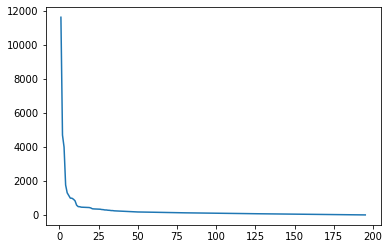

In [126]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(rank_dict["Rank"])
ypoints = np.array(rank_dict["Freq"])

plt.plot(xpoints, ypoints)
plt.show()